In [1]:
# Notes:

# data downloaded from yahoo finance over past 20 years from Jan 3, 2000 to Apr 3, 2020
# dates are inconsistent because stock market only open on business days

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from datetime import datetime
import scipy.stats as stats
import calendar
plt.style.use('ggplot')

In [3]:
sandp500 = pd.read_csv('../data/^GSPC.csv')
sandp500

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...,...
5091,2020-03-30,2558.979980,2631.800049,2545.280029,2626.649902,2626.649902,5746220000
5092,2020-03-31,2614.689941,2641.389893,2571.149902,2584.590088,2584.590088,6568290000
5093,2020-04-01,2498.080078,2522.750000,2447.489990,2470.500000,2470.500000,5947900000
5094,2020-04-02,2458.540039,2533.219971,2455.790039,2526.899902,2526.899902,6454990000


In [4]:
sandp500.nunique(axis=0)

Date         5096
Open         4994
High         4982
Low          4995
Close        4989
Adj Close    4989
Volume       4957
dtype: int64

In [5]:
sandp500.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5096.000000,5096.000000,5096.000000,5096.000000,5096.000000,5.096000e+03
mean,1593.410555,1602.581321,1583.421398,1593.567833,1593.567833,3.119292e+09
std,605.951345,607.185660,604.443100,605.997890,605.997890,1.499451e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1155.072510,1163.139984,1144.614990,1155.072510,1155.072510,1.685775e+09
50%,1366.215027,1375.614990,1357.994995,1366.559998,1366.559998,3.233955e+09
75%,2012.897491,2021.730011,1996.887482,2012.167481,2012.167481,3.927592e+09
max,3380.449951,3393.520020,3378.830078,3386.149902,3386.149902,1.145623e+10


In [6]:
sandp500['Close'].idxmax()
#max close at index 5063
sandp500.iloc[5063:5064]
#date max close on 2020-02-19

,Date,Open,High,Low,Close,Adj Close,Volume
5063,2020-02-19,3380.389893,3393.52002,3378.830078,3386.149902,3386.149902,3600150000


/Users/benkarlsberg/opt/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


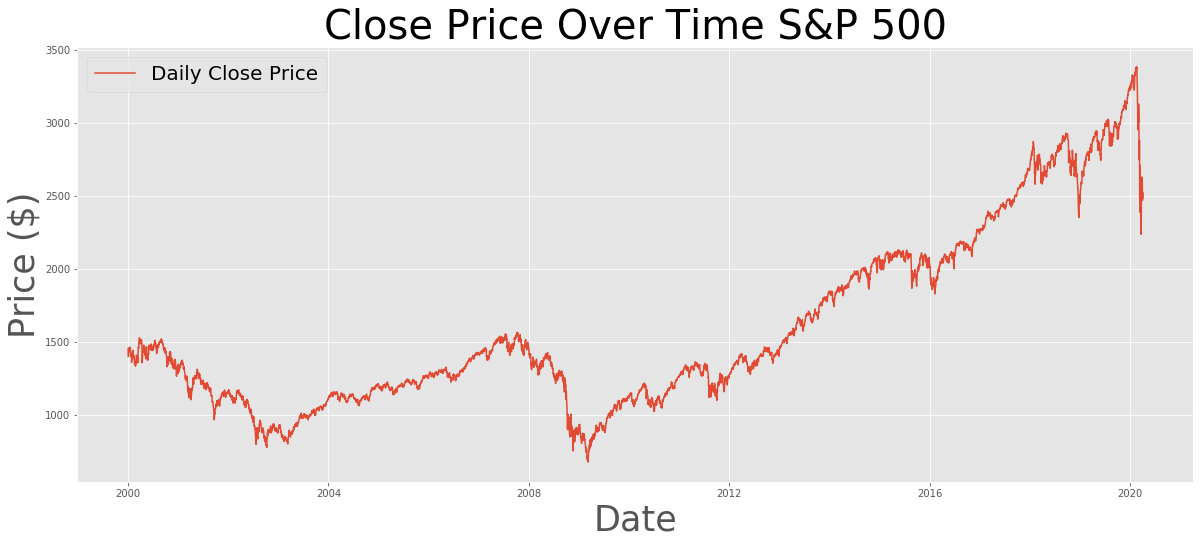

In [7]:
#Add Datetime format column
sandp500['Date_num'] = sandp500['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

fig, ax = plt.subplots(1, figsize = (20, 8))

dates = sandp500['Date_num'].to_list()
ax.plot(dates, sandp500['Adj Close'], label = "Daily Close Price")

ax.set_xlabel('Date', fontsize = 35)
ax.set_ylabel('Price ($)', fontsize = 35)
ax.set_title('Close Price Over Time S&P 500', fontsize = 40)
ax.legend(fontsize = 20)

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15) 

plt.savefig('../images/20 year S&P.png')

In [8]:
#Copy sandp500 df
df = sandp500.copy()

#Add Datetime format column

df['Date_num'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

#Add Year, Month, Day column

df['Year'] = df['Date'].apply(lambda x: "".join(x.split("-")[0]))
df['Month'] = df['Date'].apply(lambda x: "".join(x.split("-")[1]))
df['Day'] = df['Date'].apply(lambda x: "".join(x.split("-")[2]))

#Add Close Difference Column
df['Adj Close Change'] = df['Adj Close'].diff()

#Fill starting NaN value with 0
df.fillna(0, inplace = True)

#Add Label column for increase or decrease
df['Label'] = df['Adj Close Change'].apply(lambda x: 1 if x > 0 else 0)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date_num,Year,Month,Day,Adj Close Change,Label
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,2000-01-03,2000,01,03,0.000000,0
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,2000-01-04,2000,01,04,-55.799927,0
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,2000-01-05,2000,01,05,2.689941,1
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,2000-01-06,2000,01,06,1.339966,1
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,2000-01-07,2000,01,07,38.020020,1


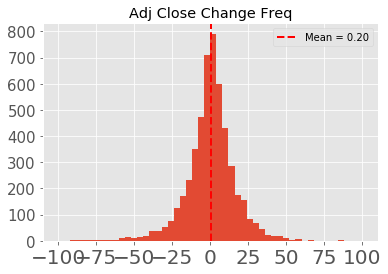

In [9]:
#note smaller bounds than Dow Jones

df['Adj Close Change'].hist(bins = 50, range=[-100, 100])
plt.axvline(df['Adj Close Change'].mean(), color='r', linestyle='dashed', linewidth=2, label = f"Mean = {df['Adj Close Change'].mean():.2f}")
plt.title('Adj Close Change Freq')

plt.legend()
            
mpl.rcParams.update(mpl.rcParamsDefault)
            
plt.savefig('../images/S&P close change hist.png')


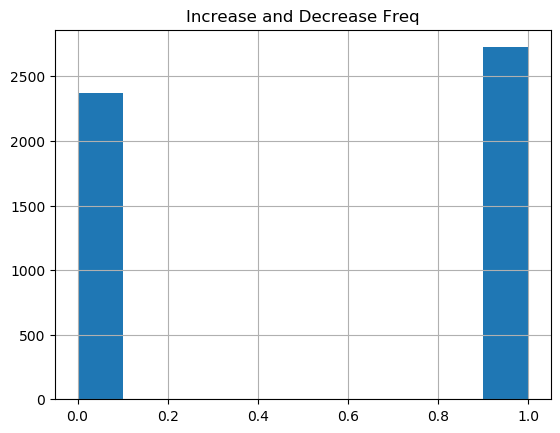

In [10]:
df['Label'].hist(bins = [0,.1, .90, 1])
plt.title('Increase and Decrease Freq')

plt.savefig('../images/S&P increase and decrease hist.png')

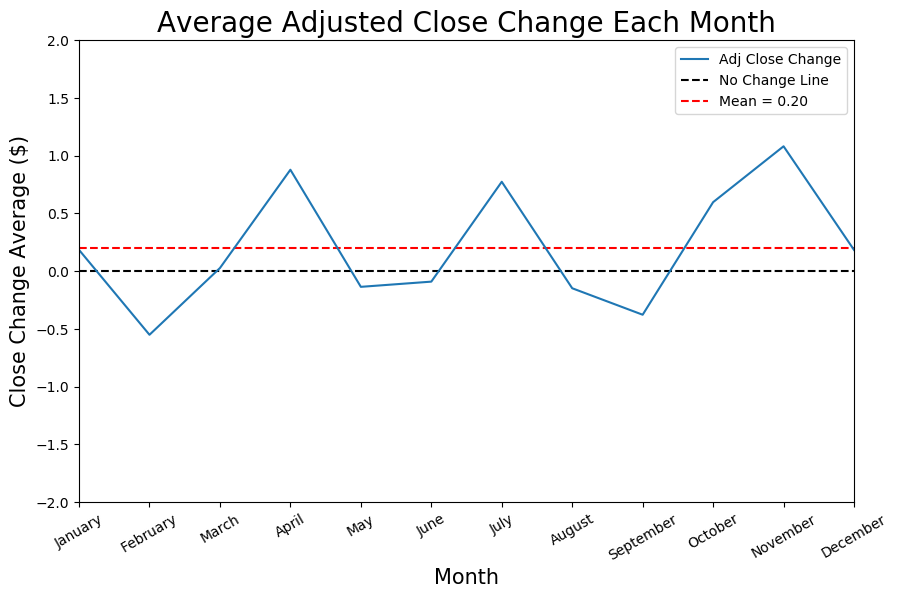

In [11]:
# Note much smaller bounds than Dow Jones

df.groupby('Month')['Adj Close Change'].mean().plot(figsize = (10, 6)).set_ylim([-2,2])

plt.hlines(0, 0, 31, label = "No Change Line", linestyles = 'dashed')
plt.hlines(df['Adj Close Change'].mean(), 0, 31, label = f"Mean = {df['Adj Close Change'].mean():.2f}", linestyles = 'dashed',colors = 'r')

plt.title('Average Adjusted Close Change Each Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Close Change Average ($)', fontsize = 15)
locs, labels = plt.xticks()           
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=30)
           
plt.legend()

plt.savefig('../images/S&P average monthly close change.png')

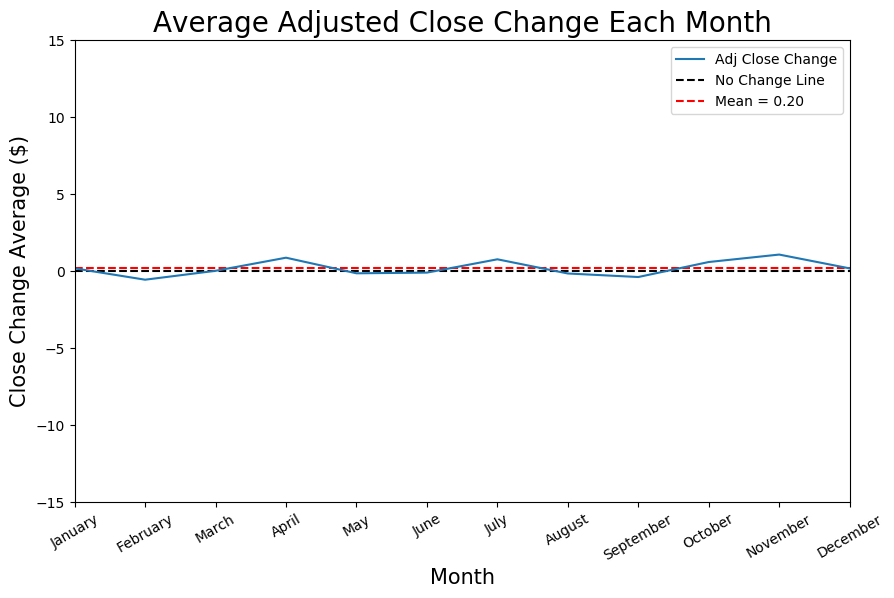

In [12]:
#Scale Comparison

df.groupby('Month')['Adj Close Change'].mean().plot(figsize = (10, 6)).set_ylim([-15,15])

plt.hlines(0, 0, 31, label = "No Change Line", linestyles = 'dashed')
plt.hlines(df['Adj Close Change'].mean(), 0, 31, label = f"Mean = {df['Adj Close Change'].mean():.2f}", linestyles = 'dashed',colors = 'r')

plt.title('Average Adjusted Close Change Each Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Close Change Average ($)', fontsize = 15)
locs, labels = plt.xticks()           
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=30)
           
plt.legend()

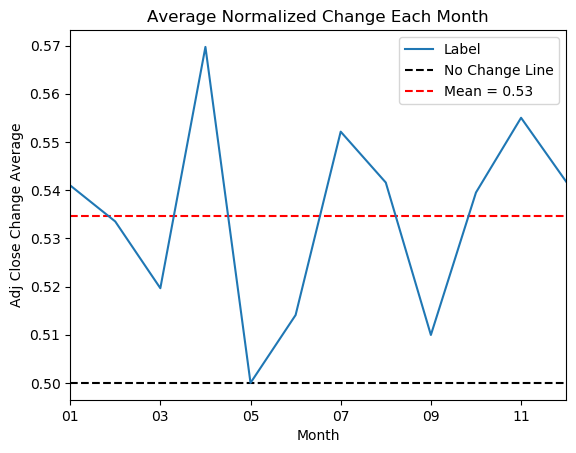

In [13]:
df.groupby('Month')['Label'].mean().plot()

plt.hlines(0.5, 0, 31, label = "No Change Line", linestyles = 'dashed')
plt.hlines(df['Label'].mean(), 0, 31, label = f"Mean = {df['Label'].mean():.2f}", linestyles = 'dashed',colors = 'r')

plt.title('Average Normalized Change Each Month')
plt.xlabel('Month')
plt.ylabel('Adj Close Change Average')
plt.legend()
           
plt.savefig('../images/S&P normalized monthly close change.png')

In [14]:
# MAKE A DATASET THAT SHOWS AN INCREASE OR DECREASE FOR EACH MONTH TO MAKE IT DISCRETE (Difference between end and beginning)
# USE RESAMPLE TO ORGANIZE DATA BY BUSINESS MONTH END
# Get frequencies for each month end increase in price
# Chi-squared on observed frequencies

In [28]:
# BMS = Business Month Start
# BM = Business Month End

resample = df[['Date_num','Adj Close Change']].resample('BM', on='Date_num').sum()

#Add Label column for increase or decrease
resample['Label'] = resample['Adj Close Change'].apply(lambda x: 1 if x > 0 else 0)
resample['Date'] = resample.index.values

resample

,Adj Close Change,Label,Date
Date_num,,,
2000-01-31,-60.760010,0,2000-01-31
2000-02-29,-28.039917,0,2000-02-29
2000-03-31,132.159912,1,2000-03-31
2000-04-28,-46.149902,0,2000-04-28
2000-05-31,-31.830078,0,2000-05-31
...,...,...,...
2019-12-31,89.800049,1,2019-12-31
2020-01-31,-5.260009,0,2020-01-31
2020-02-28,-271.300049,0,2020-02-28


In [29]:
#Add Year, Month, Day Columns
resample['Year'] = resample['Date'].apply(lambda x: x.year)
resample['Month'] = resample['Date'].apply(lambda x: x.month)
resample['Day'] = resample['Date'].apply(lambda x: x.day)

# Rearrange Columns
resample = resample[['Date', 'Year', 'Month', 'Day', 'Adj Close Change', 'Label']]
resample.reset_index(drop=True)

#Remove data from 2020
years = [*range(2000, 2020)]
resample = resample.loc[resample['Year'].isin(years)]

resample

,Date,Year,Month,Day,Adj Close Change,Label
Date_num,,,,,,
2000-01-31,2000-01-31,2000,1,31,-60.760010,0
2000-02-29,2000-02-29,2000,2,29,-28.039917,0
2000-03-31,2000-03-31,2000,3,31,132.159912,1
2000-04-28,2000-04-28,2000,4,28,-46.149902,0
2000-05-31,2000-05-31,2000,5,31,-31.830078,0
...,...,...,...,...,...,...
2019-08-30,2019-08-30,2019,8,30,-53.919922,0
2019-09-30,2019-09-30,2019,9,30,50.280029,1
2019-10-31,2019-10-31,2019,10,31,60.820069,1


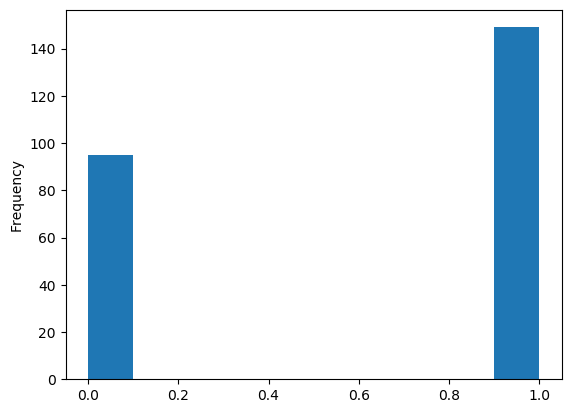

In [17]:
resample["Label"].plot(kind = 'hist')


In [30]:
monthly_increase_count = resample.groupby('Month')['Label'].sum()

monthly_increase_count

Month
1     10
2     11
3     12
4     15
5     13
6     11
7     12
8     12
9     11
10    13
11    15
12    14
Name: Label, dtype: int64

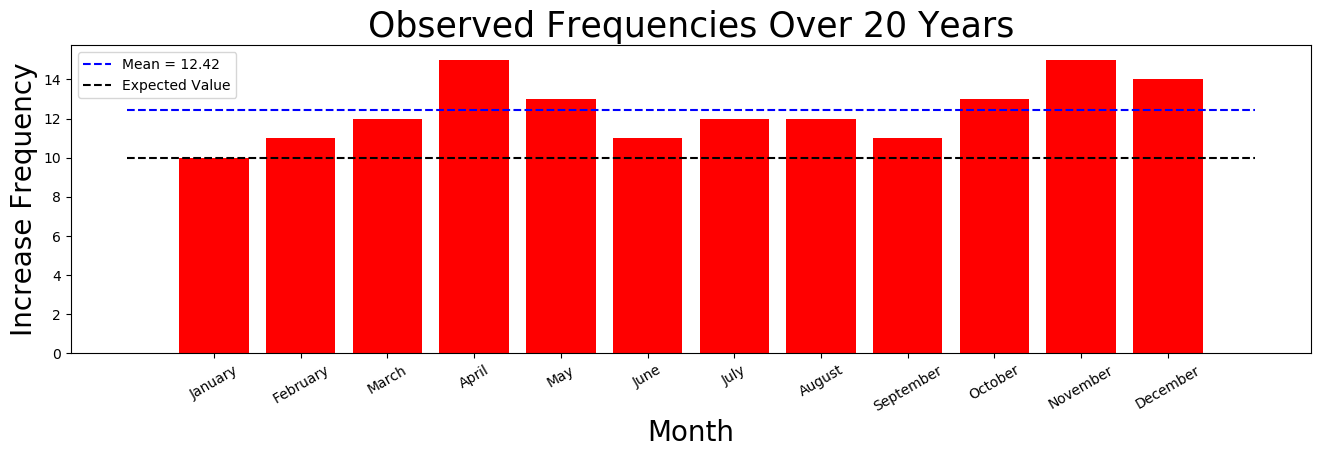

In [32]:
fig, ax = plt.subplots(1, figsize = (16, 4))
ax.bar(range(1, 13), monthly_increase_count, align='center', color = 'r');

plt.title('Observed Frequencies Over 20 Years', fontsize = 25)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Increase Frequency', fontsize = 20)

plt.hlines(monthly_increase_count.mean(), 0, 13, label = f"Mean = {monthly_increase_count.mean():.2f}", linestyles = 'dashed', color = 'b')
plt.hlines(10, 0, 13, label = "Expected Value", linestyles = 'dashed')

locs, labels = plt.xticks()           
plt.xticks(np.arange(1, 13), calendar.month_name[1:13], rotation=30)
mpl.rcParams.update(mpl.rcParamsDefault)

plt.legend()

plt.legend()

plt.savefig('../images/S&P monthly increase freqs.png')

In [40]:
#Expected to be 10 for 12 months with 240 samples 
# (Null Hypothesis = Uniform Distribution with PMF for each month being 1/12 = 240 / 12)

monthly_increase_count_contingency_table = pd.DataFrame(
    {'expected': np.repeat(10, 12), 'actual': monthly_increase_count}
)
print(monthly_increase_count_contingency_table)

       expected  actual
Month                  
1            10      10
2            10      11
3            10      12
4            10      15
5            10      13
6            10      11
7            10      12
8            10      12
9            10      11
10           10      13
11           10      15
12           10      14


In [41]:
def chi_squared_test_statistic(observeds, expecteds):
    numerators = (observeds - expecteds)**2
    ratios = numerators / expecteds
    return np.sum(ratios)

In [42]:
#12 months choosing 1 month = 11 degrees of freedom

T = chi_squared_test_statistic(monthly_increase_count_contingency_table.actual, 
                               monthly_increase_count_contingency_table.expected)

test_distribution = stats.chi2(11)
p_value = 1 - test_distribution.cdf(T)
print("p-value for All Months: {0:.10f}".format(p_value))

p-value for All Months: 0.5394040927


In [43]:
# P-VALUE IS TOO LARGE TO CONSIDER SEASONALITY AS A BIG FACTOR
# The data generated is consistent with seasonality not being a factor

In [44]:
#The null hypothesis is that there is a uniform distribution among all months where the expected value is 149/12

#The alternate hypothesis is that not all months are the same distribution

In [45]:
#FUTURE APPLICATIONS: Use datetime to measure seasonality of other topics, such as seasonal virus or bacteria activity

In [46]:
#'BQ' = Business Quarter End
#'BA' = Business Year End
# BM = Business Month End
# BMS = Business Month Begin

last_day = df[['Date_num','Close']].resample('BM', on='Date_num').last()
first_day = df[['Date_num','Close']].resample('BMS', on='Date_num').first()

month_start_end = pd.concat([first_day, last_day]).sort_index()
month_start_end["diff"] = month_start_end['Close'].diff().fillna(0)
month_start_end["% change"] = month_start_end['Close'].pct_change().fillna(0)
month_start_end["% change"] = month_start_end["% change"] * 100

month_start_end

monthly_diff = month_start_end[['Date_num', 'Close', 'diff', '% change']].resample('BM', on='Date_num').last()
monthly_diff['Month'] = monthly_diff['Date_num'].apply(lambda x: x.month)
monthly_diff['Year'] = monthly_diff['Date_num'].apply(lambda x: x.year)

monthly_diff

,Date_num,Close,diff,% change,Month,Year
Date_num,,,,,,
2000-01-31,2000-01-31,1394.459961,-60.760010,-4.175314,1,2000
2000-02-29,2000-02-29,1366.420044,-42.859985,-3.041268,2,2000
2000-03-31,2000-03-31,1498.579956,119.390015,8.656532,3,2000
2000-04-28,2000-04-28,1452.430054,-53.539917,-3.555178,4,2000
2000-05-31,2000-05-31,1420.599976,-47.650024,-3.245362,5,2000
...,...,...,...,...,...,...
2019-12-31,2019-12-31,3230.780029,116.909912,3.754489,12,2019
2020-01-31,2020-01-31,3225.520020,-32.330078,-0.992375,1,2020
2020-02-28,2020-02-28,2954.219971,-294.699951,-9.070705,2,2020


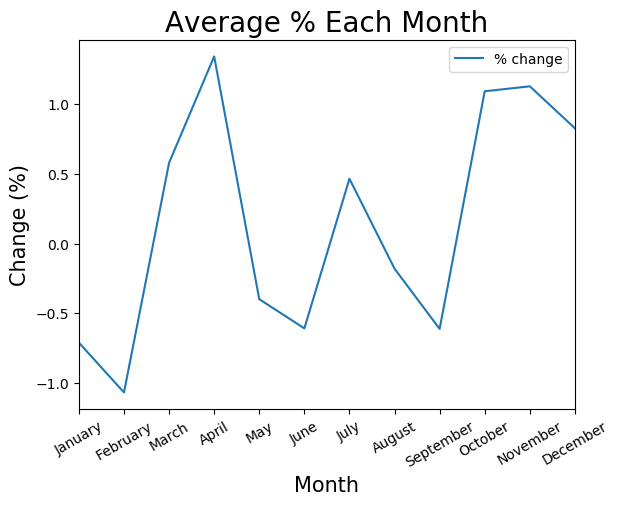

In [47]:
monthly_diff.groupby('Month')['% change'].mean().plot()

plt.title('Average % Each Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Change (%)', fontsize = 15)
locs, labels = plt.xticks()          
plt.xticks(np.arange(1, 13), calendar.month_name[1:13], rotation=30)
           
plt.legend()

# plt.savefig('../images/dji average monthly close change.png')

In [48]:
#Oct 31 to May 1

years = [*range(2000, 2020)]
nov_to_may = [11, 12, 1, 2, 3, 4]
may_to_nov = [5, 6, 7, 8, 9, 10]

#up to Dec 31, 2019

halloween = monthly_diff.loc[monthly_diff['Month'].isin(nov_to_may) & monthly_diff['Year'].isin(years)]
go_away = monthly_diff.loc[monthly_diff['Month'].isin(may_to_nov) & monthly_diff['Year'].isin(years)]

halloween

,Date_num,Close,diff,% change,Month,Year
Date_num,,,,,,
2000-01-31,2000-01-31,1394.459961,-60.760010,-4.175314,1,2000
2000-02-29,2000-02-29,1366.420044,-42.859985,-3.041268,2,2000
2000-03-31,2000-03-31,1498.579956,119.390015,8.656532,3,2000
2000-04-28,2000-04-28,1452.430054,-53.539917,-3.555178,4,2000
2000-11-30,2000-11-30,1314.949951,-106.270020,-7.477380,11,2000
...,...,...,...,...,...,...
2019-02-28,2019-02-28,2784.489990,77.959961,2.880440,2,2019
2019-03-29,2019-03-29,2834.399902,30.709961,1.095341,3,2019
2019-04-30,2019-04-30,2945.830078,78.640137,2.742760,4,2019


In [49]:
df1 = halloween.groupby('Month')['diff', '% change'].mean()
df2 = go_away.groupby('Month')['diff', '% change'].mean()
df1.sum(), df2.sum()

(diff        56.081976
 % change     3.392445
 dtype: float64, diff        4.604965
 % change   -0.240663
 dtype: float64)

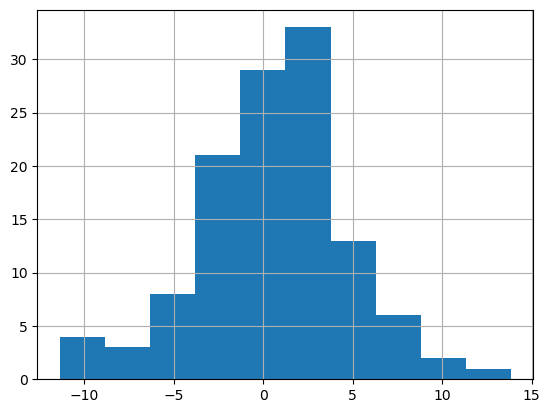

In [50]:
halloween['% change'].hist(bins = 10)

In [51]:
# We can run a student t-test to determine if the means of the two sets are significantly different from each other
#They both appear to follow a normal distribution

def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + \
                        (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)


def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df



In [52]:
test_statistic = welch_test_statistic(halloween['% change'], go_away['% change'])
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

degrees_freedom = welch_satterhwaithe_df(halloween['% change'], go_away['% change'])
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(degrees_freedom))



Welch Test Statistic: 1.13
Degrees of Freedom for Welch's Test: 237.96


In [54]:
students = stats.t(degrees_freedom)

p_value = students.cdf(-test_statistic) + (1 - students.cdf(test_statistic))
print("p-value for different seasons: {:2.2f}".format(p_value))



p-value for different seasons: 0.26
